In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
data  = pd.read_csv("/kaggle/input/ipl-data-set/matches.csv")

In [3]:
data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
data.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
data[data["city"].isnull()]

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,IPL-2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,IPL-2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,IPL-2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,IPL-2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,IPL-2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [7]:
#Fill missing  Values

#Replacing missing values for city with 'Dubai' as the venue for match is 'Dubai'
data["city"] = data["city"].fillna("Dubai")

#Some rows has missing values for 'winner' as the match was concluded as 'no result'.
data["winner"] = data["winner"].fillna("No Result")

#Some rows has missing values for 'player_of_match' as the match was concluded as 'no result'.
data["player_of_match"] = data["player_of_match"].fillna("No Result")

data['umpire1'] = data['umpire1'].fillna(data['umpire1'].mode())
data['umpire2'] = data['umpire2'].fillna(data['umpire2'].mode())
data['umpire3'] = data['umpire3'].fillna(data['umpire3'].mode())

In [8]:
season_winner = data.groupby(['Season','winner']).size().reset_index()
season_winner.rename(columns = {0:'winner_count'}, inplace = True)

# Number of matches won by teams in each season

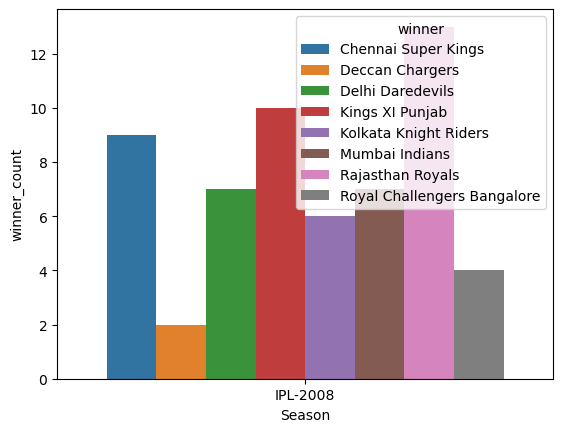

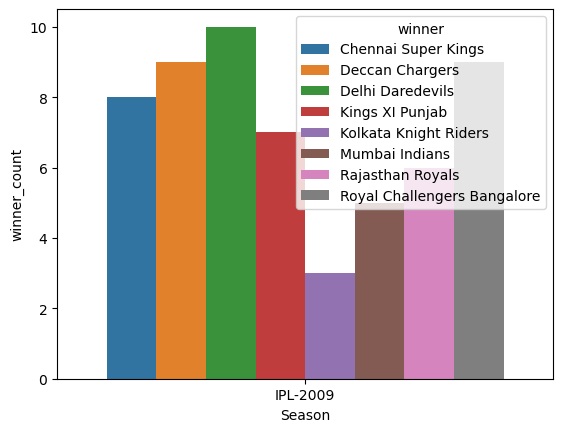

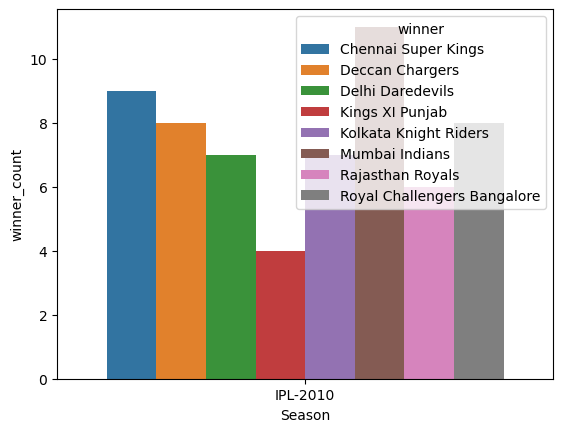

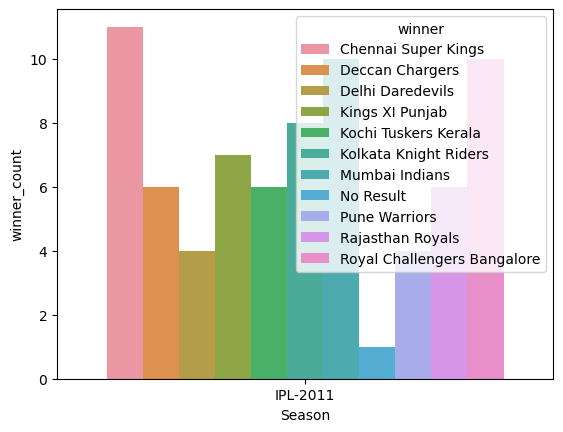

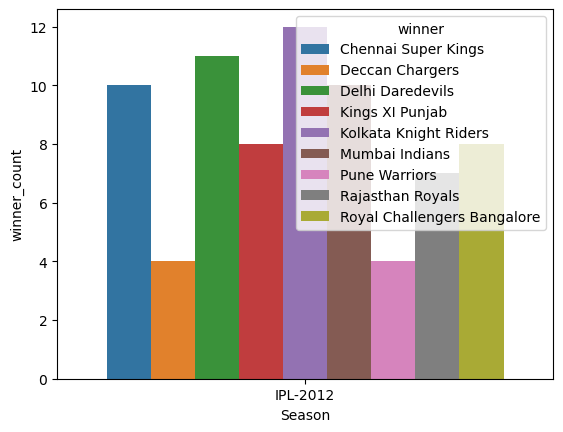

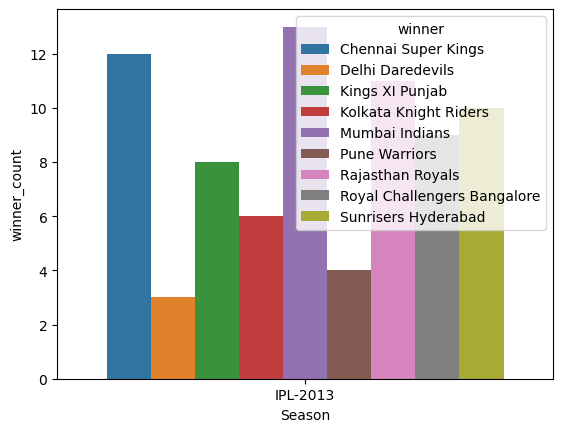

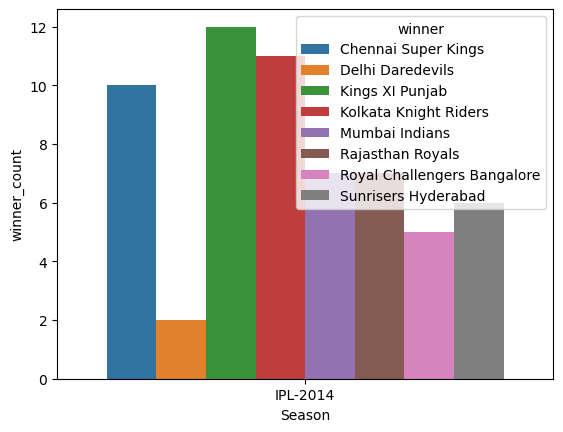

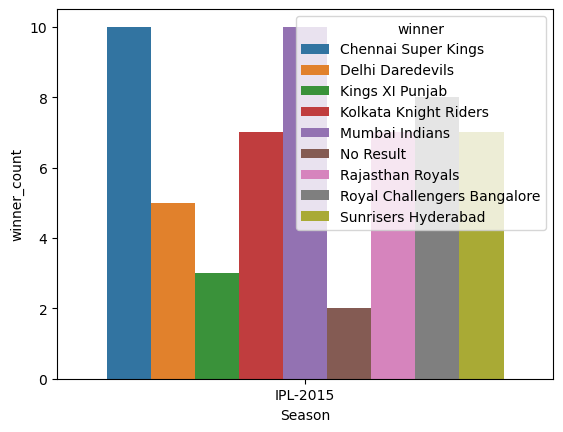

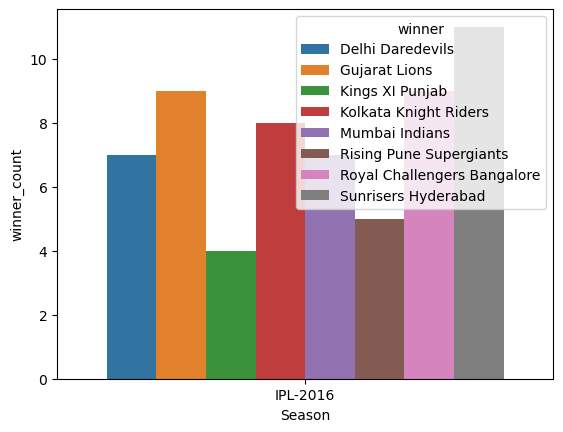

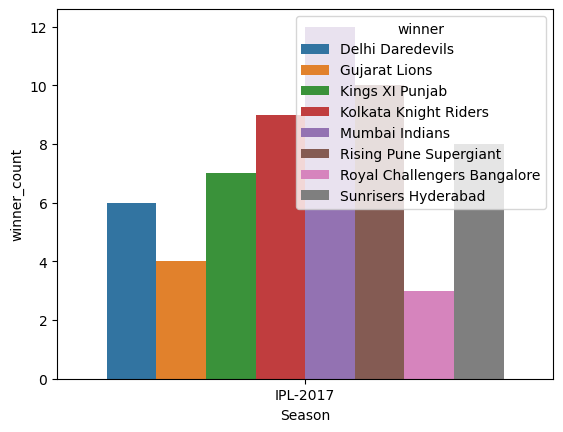

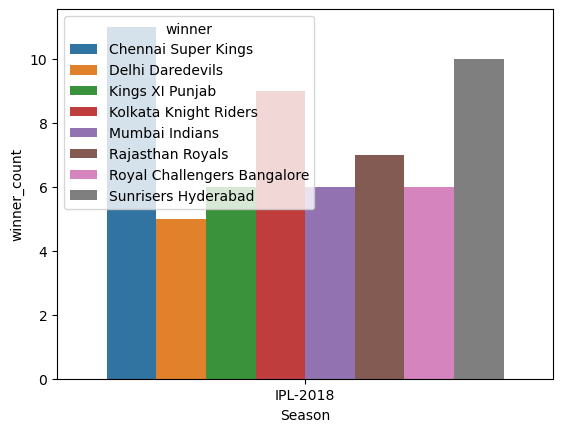

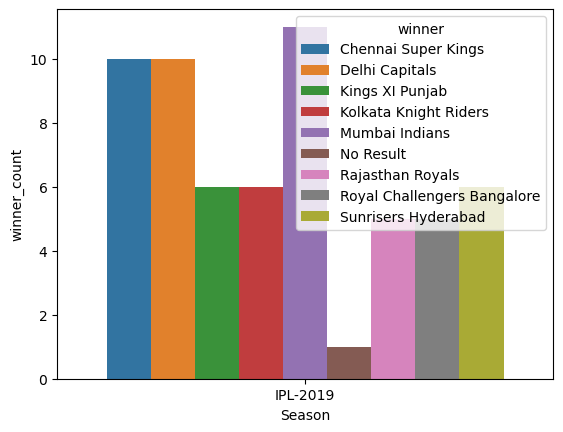

In [9]:
for i in season_winner["Season"].unique():
    season_winner_per_year = season_winner[season_winner['Season']==i]
    sns.barplot(x='Season',y = 'winner_count',data = season_winner_per_year,hue = 'winner',errwidth = 8)
    plt.show()

In [10]:
#Create a new column to determine whether toss was helpful in winning matches
def wasTossUsefull(data):
    if data['toss_winner'] == data["winner"]:
        return 1
    else:
        return 0
    
data['toss_and_match_winner'] = data.apply(lambda row: wasTossUsefull(row), axis=1)    

In [11]:
toss_match_winner_count = data.groupby(['Season','toss_and_match_winner']).size().reset_index()
toss_match_winner_count.rename(columns = {0:'count'},inplace = True)

# Check whether toss was helpful in winning matches

<Axes: xlabel='Season', ylabel='count'>

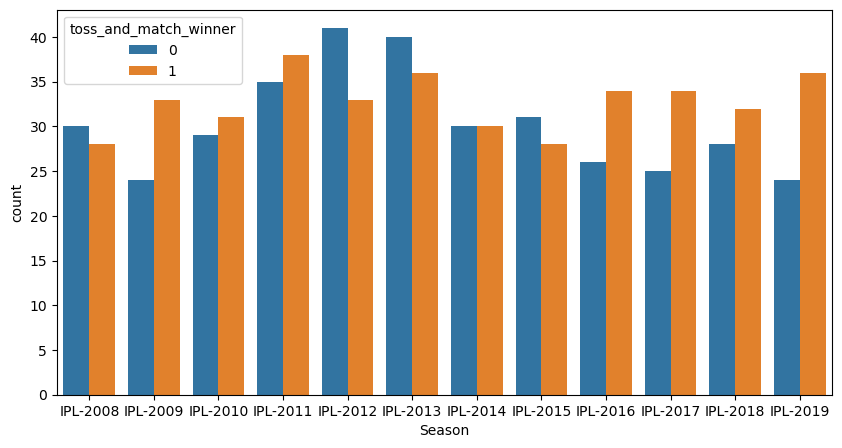

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Season',y = 'count',data = toss_match_winner_count,hue = 'toss_and_match_winner')

In the above graph '0' represents toss was not crucial for winning the matches. '1' represents winning the match after winning toss
For example in Season 2019, more number of matches were won by teams who won the toss. Therefore toss was crucial in season 2019 

In [13]:
toss_decision_per_season = data.groupby(['Season','toss_decision']).size().reset_index()
toss_decision_per_season.rename(columns = {0:'count'},inplace = True)

# For each season determine if teams choose to field or bat first in most of the cases 

<Axes: xlabel='Season', ylabel='count'>

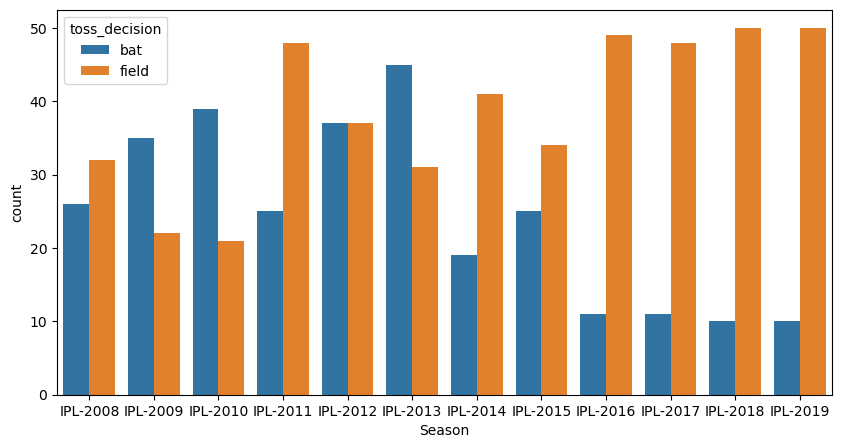

In [14]:
plt.figure(figsize=(10,5))
sns.barplot(x='Season',y='count',data=toss_decision_per_season,hue= 'toss_decision')

In most seasons, teams choose to chase than defend.

In [15]:
#Create a new column to determine whether teams won chasing or defending
def chaseOrDefend(data):
    if(data['toss_winner'] == data["winner"] and data['toss_decision'] == 'field') or (data['toss_winner'] != data["winner"] and data['toss_decision'] == 'bat'):
        return 'Chasing team won'
    else:
        return 'Defending team won'  
    
data['chase_or_defend'] = data.apply(lambda row: chaseOrDefend(row), axis=1)  

In [16]:
chase_or_defend_count = data.groupby(['Season','chase_or_defend']).size().reset_index()
chase_or_defend_count.rename(columns = {0:'count'},inplace = True)

# Determine who has won most number of times - Chasing or Defending

<Axes: xlabel='Season', ylabel='count'>

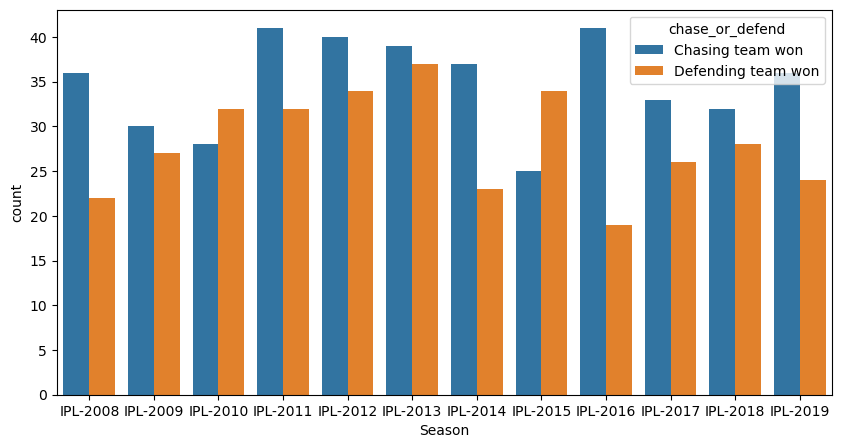

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(x = 'Season',y = 'count',data = chase_or_defend_count,hue = 'chase_or_defend')

In most of the seasons, Chasing team have won the most when compared to defending.

# Player of the match for each season 

In [18]:
player_of_match_per_season = data.groupby(['Season','player_of_match']).size().reset_index()
player_of_match_per_season.rename(columns = {0:'count'},inplace = True)

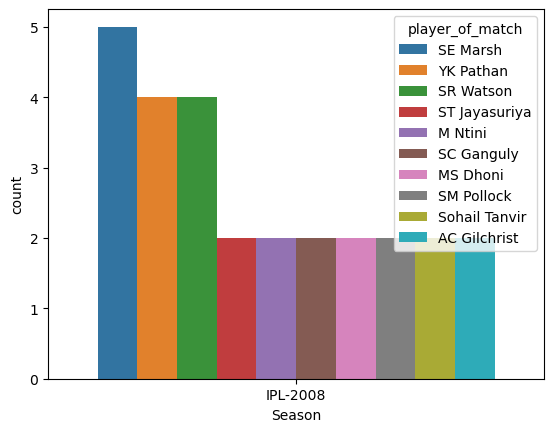

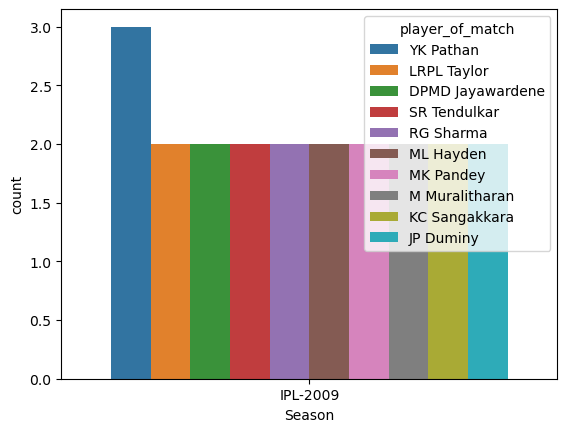

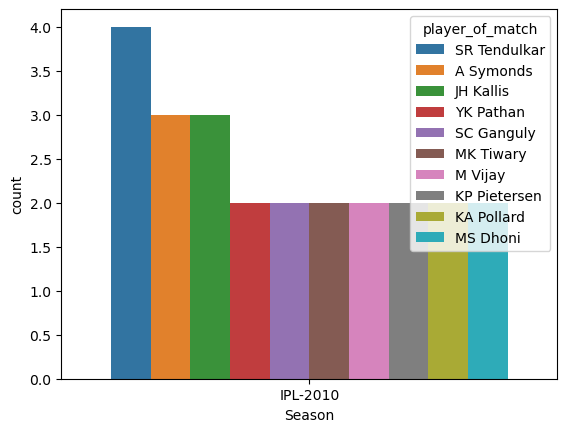

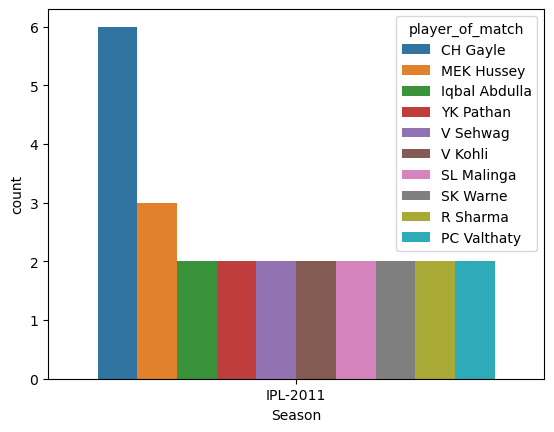

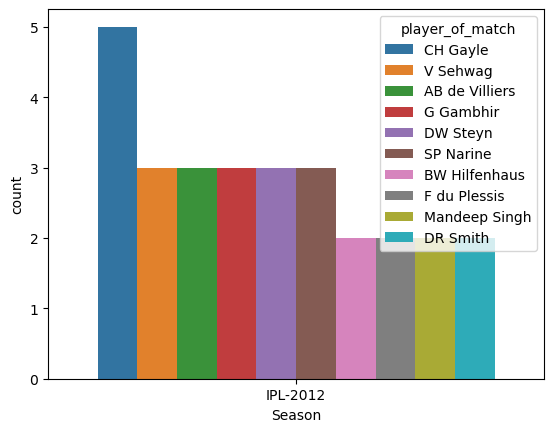

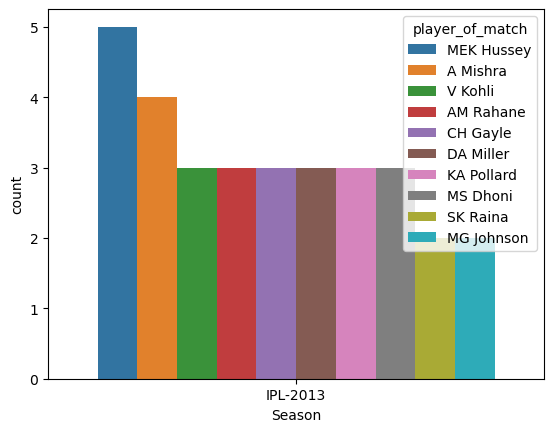

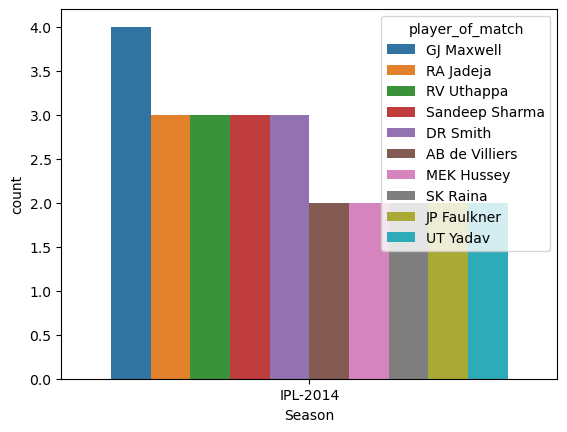

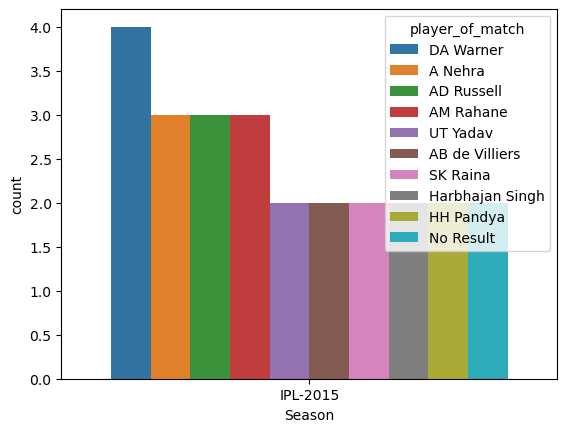

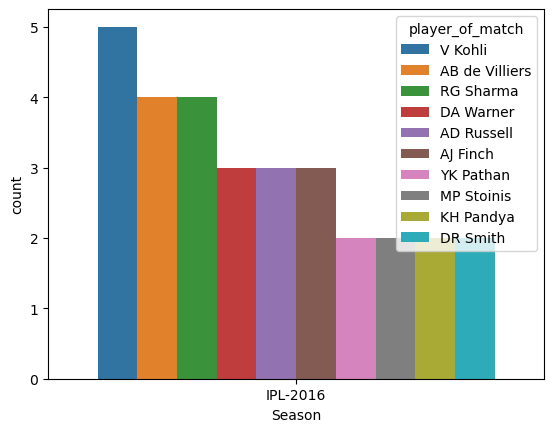

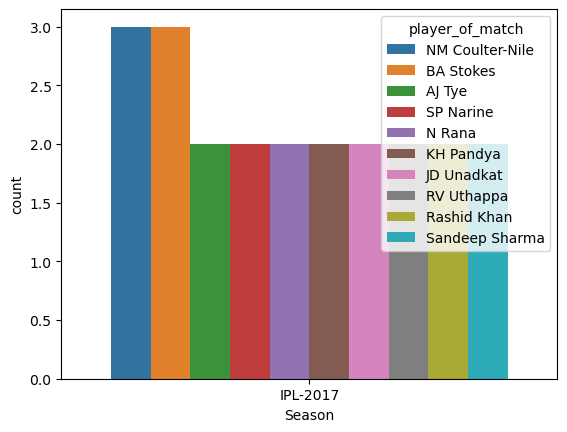

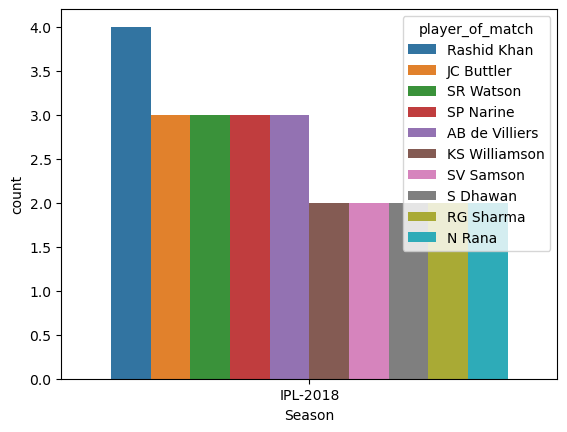

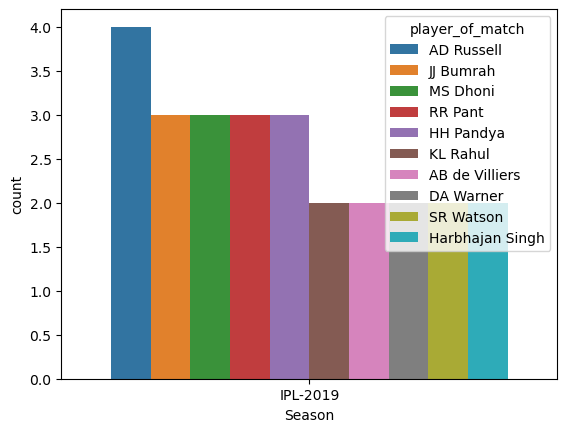

In [19]:
for i in player_of_match_per_season['Season'].unique():
    player_of_match = player_of_match_per_season[player_of_match_per_season['Season'] == i].sort_values(by = ['count'],ascending = False)[:10]
    sns.barplot(x='Season',y = 'count',data = player_of_match,hue = 'player_of_match')
    plt.show()

# Most number of player of match award considering all the season

In [20]:
player_count = data['player_of_match'].value_counts()[:10]
px.bar(player_count,x= player_count.index,y= player_count.values)